## Spacial Filtering

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


%matplotlib inline

### Project Objective:
> #### Spatial Filtering
> ##### Spatial filtering of an image. Fix the size of the spatial mask at 3x3, but the coefficients need to be variables that can be input into your program. This project is generic, in the sense that it will be used in other projects to follow.

##### Importing one of the images to develop our implementation.

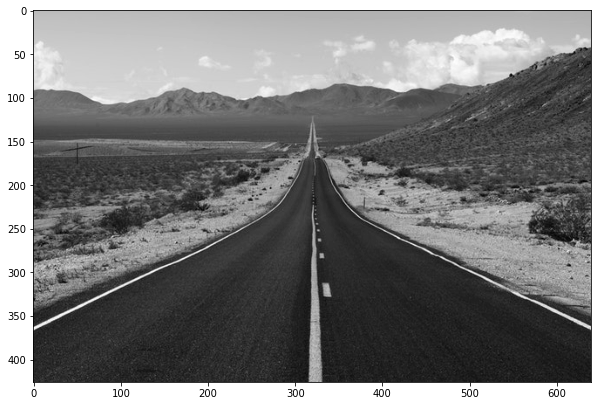

In [ ]:
image1 = cv2.imread('image1.jpg')
image1 = cv2.cvtColor(image1,cv2.COLOR_RGB2GRAY)
plt.figure(figsize = (10,8))
plt.imshow(image1, cmap = 'gray')

> ### For the purpose of applying a filter mask on an image I made a function which loops through x and y axis of image in two nested for loops and will do the convolve operation. Firstly, it will make an empty array of the source dimention with zeroes then inside the loop it will make a temporary pixel and then the pixel will be appended to the empty array at the relative space of i and j witch is looped on x and y.

In [ ]:
def ApplyFilter(img, mask):
  x, y = img.shape
  
  img_new = np.zeros([x, y])
 
  for i in range(1, x-1):
      for j in range(1, y-1):
          temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]

          img_new[i, j]= temp
         
  img_new = img_new.astype(np.uint8)
  return img_new


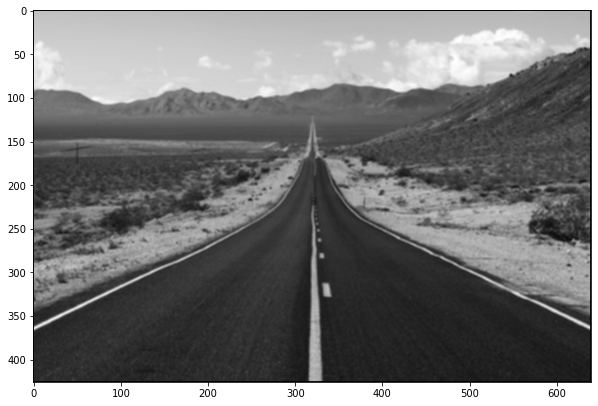

In [ ]:
mask332a = np.ones([3, 3], dtype = int)
mask332a = mask332a / 9

image1Blured = ApplyFilter(image1, mask332a)

plt.figure(figsize = (10,8))
plt.imshow(image1Blured, cmap = 'gray')

> ### Enhancement Using the Laplacian
> Using the programs developed in Project to implement the Laplacian enhancement technique described in connection with Eq.

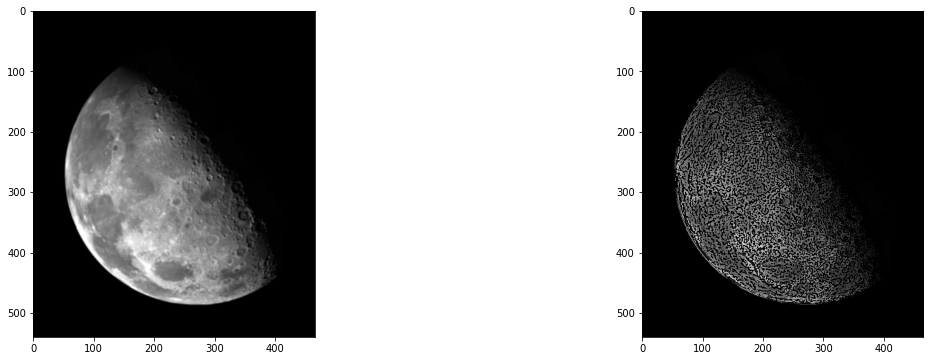

In [ ]:
image338 = cv2.imread('Fig0338(a)(blurry_moon).tif')
image338 = cv2.cvtColor(image338,cv2.COLOR_RGB2GRAY)

mask_lap = np.array([[1,1,1],
                    [1,-8,1],
                    [1,1,1]])

# Create Laplacian Matrices
lap = ApplyFilter(image338, mask_lap)

c = -1  # (must be negative)


image338 = image338.astype('int16')
result = cv2.add(image338, (c * lap))

LapEnhImage = np.clip(result,0,255)

fig = plt.figure(figsize = (20,6))
fig.add_subplot(1,2,1)
plt.imshow(image338, cmap = 'gray')
fig.add_subplot(1,2,2)
plt.imshow(LapEnhImage, cmap = 'gray')


### As I made the averaging filter before, I used it to make a blured version of image and then I subtracted blured image from original to make an unsharp mask.
### Then I chose k = 6 to make that a high boost filtering process and then implemented and applied that.

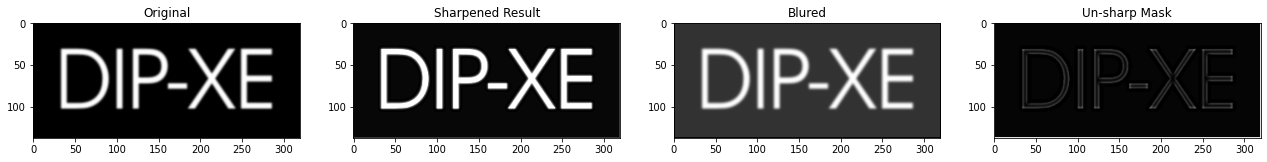

In [ ]:
image340 = cv2.imread('Fig0340(a)(dipxe_text).tif')
image340 = cv2.cvtColor(image340,cv2.COLOR_RGB2GRAY)

image340Blured = ApplyFilter(image340, mask332a)

mask_unsharp = cv2.subtract(image340, image340Blured)

k = 6 # Weight

image340Sharpened = cv2.add(image340, (k * mask_unsharp))

fig = plt.figure(figsize = (22,6))
fig.add_subplot(1,4,1)
plt.title("Original")
plt.imshow(image340, cmap = 'gray')
fig.add_subplot(1,4,2)
plt.title("Sharpened Result")
plt.imshow(image340Sharpened, cmap = 'gray')
fig.add_subplot(1,4,3)
plt.title("Blured")
plt.imshow(image340Blured, cmap = 'gray')
fig.add_subplot(1,4,4)
plt.title("Un-sharp Mask")
plt.imshow(mask_unsharp, cmap = 'gray')